# MACHINE LEARNING FOR MINI SEARCH ENGINE

## Data Preparation

### Importing library package and reading dataset file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, concatenate, Dense, Dot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
basePath = 'C:/Users/ASUS/Documents/Code/Capstone'
book = pd.read_csv(basePath+'/Buku.csv')

## Data Understanding

### Displays the number of columns and rows in the dataset and the top 10 data from the dataset

In [3]:
print("Dataset buku memiliki %d baris dan %d kolom" % book.shape)
book.head(10)

Dataset buku memiliki 30 baris dan 13 kolom


,P-ISSN,E-ISSN,Keyword,Judul,Penulis,TahunTerbit,Publisher,Volume,NoEdisi,JumlahHalaman,Pdf,Reference,Abstrak
0,2339-2401,2477-0221,"Perilaku Sosial, Anak Putus Sekolah.",Perilaku Sosial Anak Putus Sekolah,"Rahmad. M, Muhlis Madani, Risfaisal",2016,Program Studi Pendidikan Sosiologi Fakultas Ke...,4,2,10,Books/500-1382-1-PB.pdf,https://journal.unismuh.ac.id/index.php/equili...,Penelitian ini bertujuan untuk mengetahui peri...
1,2252-7877,2548-3582,"maggot, budidaya, penghematan biaya pakan",Analisis Usaha Budidaya Maggot sebagai Alterna...,"Rizal Ula Ananta Fauzi, Eka Resty Novieta Sari",2018,"Department of Agro-Industrial Technology, Facu...",7,1,8,Books/312-1411-1-PB.pdf,https://industria.ub.ac.id/index.php/industri/...,Meningkatnya kebutuhan protein hewani menyebab...
2,2252-861x,2715-2685,"Agroindustri, Tahu, Pendapatan, Biaya, dan Efi...",ANALISIS USAHA AGROINDUSTRI TAHU DI DESA KAMPU...,"Erlangga Marsila , Elfi Indrawanis dan Jamalludin",2022,"Fakultas Pertanian, Universitas Islam Kuantan ...",11,2,7,Books/2214-ArticleText-9396-1-10-20220518.pdf,https://www.ejournal.uniks.ac.id/index.php/GRE...,Penelitian ini bertujuan: 1) Untuk mengetahui ...
3,NaN,2807-5633,"Indonesian, Indonesian Education Report Card, ...",Rapor Pendidikan Indonesia: Quo Vadis Kualitas...,"Dwi Shintia, Masduki Asbari, Fadhila Khairunis...",2023,Journal of Information Systems and Management ...,2,6,4,Books/ArticleText-0206-18-21.pdf,https://jisma.org/index.php/jisma/article/view...,Tujuan dari studi ini adalah untuk mengetahui ...
4,3021-7474,3021-7466,"education, effective, interactive, Technology,...",Analisa Pengaruh Virtual Reality Terhadap Perk...,"Charles, Delvian Yosuky,Tio Sania Rachmi, Eryc",2023,"Pusat Riset dan Inovasi Nasional, Universitas ...",1,3,14,Books/40-53+Analisa+Pengaruh+Virtual+Reality+T...,https://jurnal.stikes-ibnusina.ac.id/index.php...,Kemajuan teknologi yang pesat telah membawa in...
5,2580-3735,2580-1147,"Akhlak, Media Pembelajaran, Pengembangan",Pengembangan Game Interaktif Wordwall untuk Me...,"Olisna Olisna, Milhatun Zannah, Auliani Sukma,...",2022,Universitas Pahlawan Tuanku Tambusai,6,3,11,"Books/admin,+97.+Olisna+4133+-+4143.pdf",https://jbasic.org/index.php/basicedu/article/...,Pembelajaran anak mengenai moral dan akhlak ke...
6,NaN,2723-6390,"Pengembangan Aplikasi, Game Edukatif, Literasi...",Strategi Literasi Budaya Anak Usia Dini melalu...,"Esti Kurniawati Mahardika, Tiara Sevi Nurmanit...",2023,Perkumpulan Pengelola Jurnal PAUD Indonesia,4,2,14,Books/287-ArticleText-1948-1-10-20231117.pdf,https://www.murhum.ppjpaud.org/index.php/murhu...,Game dapat membantu anak usia dini (AUD) untuk...
7,2356-1327,2549-8959,"game edukasi 3d, cinta tanah air, anak usia dini",Pengembangan Game Edukasi 3D untuk Menumbuhkan...,"Indaria Tri Hariyani, Norma Diana Fitri",2023,Universitas Pahlawan Tuanku Tambusai,7,2,14,Books/3378-18624-3-PB.pdf,https://mail.obsesi.or.id/index.php/obsesi/art...,Saat ini pegaruh budaya Barat menyebabkan gaya...
8,2580-3735,2580-1147,"Game Edukasi, Android, Hasil Belajar",Pengembangan Game Edukasi Berbasis Android unt...,"Ririn Windawati, Henny Dewi Koeswanti",2021,Universitas Pahlawan Tuanku Tambusai,5,2,12,"Books/admin,+64+Ririn+Windawati+1027-1038.pdf",https://jbasic.org/index.php/basicedu/article/...,Media pembelajaran adalah alat bantu guru untu...
9,NaN,1411-3201,"E-commerce, Model View Controller, Website",WEBSITE E-COMMERCE MENGGUNAKAN MODEL VIEW CONT...,Donni Prabowo,2015,Universitas Amikom Yogyakarta,16,1,7,Books/225-705-1-PB.pdf,https://ojs.amikom.ac.id/index.php/dasi/articl...,Buying and selling is already often done in li...


### Displays the number of non-empty rows (NaN) of the dataset and the data type of the dataset

In [4]:
book.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   P-ISSN         22 non-null     object
 1   E-ISSN         30 non-null     object
 2   Keyword        30 non-null     object
 3   Judul          30 non-null     object
 4   Penulis        30 non-null     object
 5   TahunTerbit    30 non-null     int64 
 6   Publisher      30 non-null     object
 7   Volume         30 non-null     int64 
 8   NoEdisi        30 non-null     int64 
 9   JumlahHalaman  30 non-null     int64 
 10  Pdf            30 non-null     object
 11  Reference      30 non-null     object
 12  Abstrak        30 non-null     object
dtypes: int64(4), object(9)
memory usage: 3.2+ KB


### Displays the number of duplicate data

In [5]:
book.duplicated().sum()

0

## Cleaning Data

### Cleaning dataset : delete columns that are not needed in the data analysis process or in creating machine learning models

In [6]:
book.drop(axis=1, labels=['P-ISSN', 'Pdf', 'Reference'], inplace=True)
book.head(10)

,E-ISSN,Keyword,Judul,Penulis,TahunTerbit,Publisher,Volume,NoEdisi,JumlahHalaman,Abstrak
0,2477-0221,"Perilaku Sosial, Anak Putus Sekolah.",Perilaku Sosial Anak Putus Sekolah,"Rahmad. M, Muhlis Madani, Risfaisal",2016,Program Studi Pendidikan Sosiologi Fakultas Ke...,4,2,10,Penelitian ini bertujuan untuk mengetahui peri...
1,2548-3582,"maggot, budidaya, penghematan biaya pakan",Analisis Usaha Budidaya Maggot sebagai Alterna...,"Rizal Ula Ananta Fauzi, Eka Resty Novieta Sari",2018,"Department of Agro-Industrial Technology, Facu...",7,1,8,Meningkatnya kebutuhan protein hewani menyebab...
2,2715-2685,"Agroindustri, Tahu, Pendapatan, Biaya, dan Efi...",ANALISIS USAHA AGROINDUSTRI TAHU DI DESA KAMPU...,"Erlangga Marsila , Elfi Indrawanis dan Jamalludin",2022,"Fakultas Pertanian, Universitas Islam Kuantan ...",11,2,7,Penelitian ini bertujuan: 1) Untuk mengetahui ...
3,2807-5633,"Indonesian, Indonesian Education Report Card, ...",Rapor Pendidikan Indonesia: Quo Vadis Kualitas...,"Dwi Shintia, Masduki Asbari, Fadhila Khairunis...",2023,Journal of Information Systems and Management ...,2,6,4,Tujuan dari studi ini adalah untuk mengetahui ...
4,3021-7466,"education, effective, interactive, Technology,...",Analisa Pengaruh Virtual Reality Terhadap Perk...,"Charles, Delvian Yosuky,Tio Sania Rachmi, Eryc",2023,"Pusat Riset dan Inovasi Nasional, Universitas ...",1,3,14,Kemajuan teknologi yang pesat telah membawa in...
5,2580-1147,"Akhlak, Media Pembelajaran, Pengembangan",Pengembangan Game Interaktif Wordwall untuk Me...,"Olisna Olisna, Milhatun Zannah, Auliani Sukma,...",2022,Universitas Pahlawan Tuanku Tambusai,6,3,11,Pembelajaran anak mengenai moral dan akhlak ke...
6,2723-6390,"Pengembangan Aplikasi, Game Edukatif, Literasi...",Strategi Literasi Budaya Anak Usia Dini melalu...,"Esti Kurniawati Mahardika, Tiara Sevi Nurmanit...",2023,Perkumpulan Pengelola Jurnal PAUD Indonesia,4,2,14,Game dapat membantu anak usia dini (AUD) untuk...
7,2549-8959,"game edukasi 3d, cinta tanah air, anak usia dini",Pengembangan Game Edukasi 3D untuk Menumbuhkan...,"Indaria Tri Hariyani, Norma Diana Fitri",2023,Universitas Pahlawan Tuanku Tambusai,7,2,14,Saat ini pegaruh budaya Barat menyebabkan gaya...
8,2580-1147,"Game Edukasi, Android, Hasil Belajar",Pengembangan Game Edukasi Berbasis Android unt...,"Ririn Windawati, Henny Dewi Koeswanti",2021,Universitas Pahlawan Tuanku Tambusai,5,2,12,Media pembelajaran adalah alat bantu guru untu...
9,1411-3201,"E-commerce, Model View Controller, Website",WEBSITE E-COMMERCE MENGGUNAKAN MODEL VIEW CONT...,Donni Prabowo,2015,Universitas Amikom Yogyakarta,16,1,7,Buying and selling is already often done in li...


### Displays the number of non-empty rows (NaN) of the dataset and the data type of the dataset(After cleaning dataset)

In [7]:
book.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   E-ISSN         30 non-null     object
 1   Keyword        30 non-null     object
 2   Judul          30 non-null     object
 3   Penulis        30 non-null     object
 4   TahunTerbit    30 non-null     int64 
 5   Publisher      30 non-null     object
 6   Volume         30 non-null     int64 
 7   NoEdisi        30 non-null     int64 
 8   JumlahHalaman  30 non-null     int64 
 9   Abstrak        30 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.5+ KB


## Visualization data

### Displays the percentage of data based on year of publication

In [8]:
df = book.copy()
nums_book = df.groupby('TahunTerbit')['Abstrak'].count().reset_index()
nums_book.rename(columns = {'Abstrak' : 'TotalBuku'}, inplace=True)
nums_book['BooksPct'] = round(nums_book.TotalBuku / nums_book.TotalBuku.sum(), 2)
nums_book

,TahunTerbit,TotalBuku,BooksPct
0,2015,2,0.07
1,2016,2,0.07
2,2018,4,0.13
3,2019,1,0.03
4,2020,2,0.07
5,2021,3,0.10
6,2022,3,0.10
7,2023,13,0.43


### Displays the percentage of data based on year of publication(Piechart)

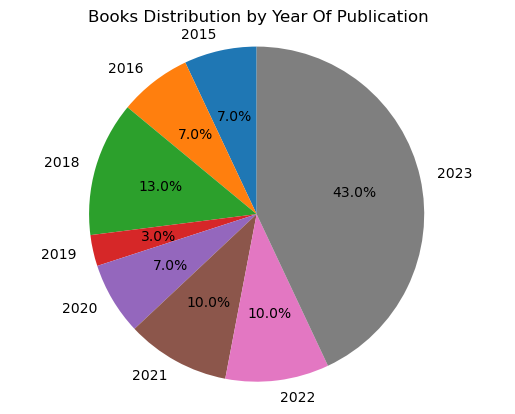

In [9]:
labels = nums_book['TahunTerbit']
sizes = nums_book['BooksPct']

# Membuat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)

# Konfigurasi tambahan
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.title('Books Distribution by Year Of Publication')

# Menampilkan pie chart
plt.show()

### Displays descriptive statistics of the data

In [10]:
df.describe()

,TahunTerbit,Volume,NoEdisi,JumlahHalaman
count,30.000000,30.000000,30.000000,30.000000
mean,2020.700000,6.166667,2.200000,9.733333
std,2.731048,5.866817,1.297212,2.899861
min,2015.000000,1.000000,1.000000,4.000000
25%,2018.250000,2.250000,1.000000,7.250000
50%,2022.000000,5.000000,2.000000,9.500000
75%,2023.000000,7.000000,2.000000,11.750000
max,2023.000000,28.000000,6.000000,15.000000


### Displays correlation between data

In [11]:
df.corr()

,TahunTerbit,Volume,NoEdisi,JumlahHalaman
TahunTerbit,1.000000,0.039815,0.406854,0.368354
Volume,0.039815,1.000000,-0.235609,0.069589
NoEdisi,0.406854,-0.235609,1.000000,0.014667
JumlahHalaman,0.368354,0.069589,0.014667,1.000000


### Displays correlation between data(Heatmap)

<AxesSubplot:>

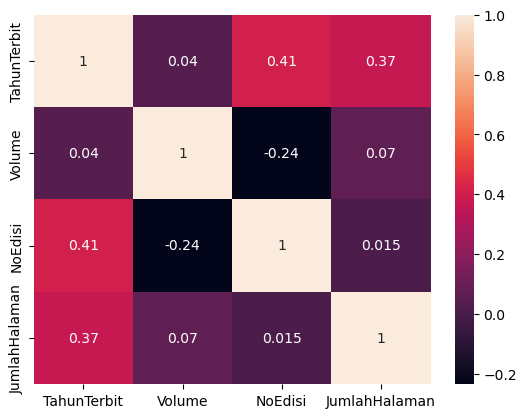

In [12]:
sns.heatmap(df.corr(), annot=True)

## Modeling

### Model: match the title to the year

In [13]:
scaler = StandardScaler()
train_data, test_data = train_test_split(book, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['Judul'])
X_test = tfidf_vectorizer.transform(test_data['Judul'])

# Convert labels to numerical values
y_train = scaler.fit_transform(train_data['TahunTerbit'].values.reshape(-1, 1))
y_test = scaler.transform(test_data['TahunTerbit'].values.reshape(-1, 1))

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train.toarray(), y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test.toarray(), y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/20


1/1 [==============================] - 1s 812ms/step - loss: 1.0840 - mae: 0.9059 - val_loss: 0.4872 - val_mae: 0.5944
Epoch 2/20
1/1 [==============================] - 0s 34ms/step - loss: 1.0470 - mae: 0.8864 - val_loss: 0.4882 - val_mae: 0.5940
Epoch 3/20
1/1 [==============================] - 0s 35ms/step - loss: 1.0114 - mae: 0.8672 - val_loss: 0.4892 - val_mae: 0.5935
Epoch 4/20
1/1 [==============================] - 0s 37ms/step - loss: 0.9772 - mae: 0.8484 - val_loss: 0.4900 - val_mae: 0.5930
Epoch 5/20
1/1 [==============================] - 0s 35ms/step - loss: 0.9443 - mae: 0.8298 - val_loss: 0.4908 - val_mae: 0.5923
Epoch 6/20
1/1 [==============================] - 0s 36ms/step - loss: 0.9125 - mae: 0.8114 - val_loss: 0.4914 - val_mae: 0.5914
Epoch 7/20
1/1 [==============================] - 0s 31ms/step - loss: 0.8814 - mae: 0.7930 - val_loss: 0.4921 - val_mae: 0.5905
Epoch 8/20
1/1 [==============================] - 0s 34ms/step - loss: 0.8508 - mae: 0.7744 -

### Model : search engine by Judul, Keyword, Abstrak, and Tahun Terbit

In [14]:
book['BookID'] = range(len(book))
tfidf_vectorizer = TfidfVectorizer()
keyword_matrix = tfidf_vectorizer.fit_transform(book['Judul'] + ' ' + book['Keyword'] + ' ' + book['Abstrak'])
def get_keyword_recommendations(keyword):
    input_vector = tfidf_vectorizer.transform([keyword])
    keyword_similarities = cosine_similarity(keyword_matrix, input_vector)
    similar_books = keyword_similarities.argsort(axis=0)[:-6:-1].flatten()
    return book['Judul'].iloc[similar_books]

keyword_recommendations = get_keyword_recommendations("Lahan Uang")
print("Keyword Recommendations:")
print(keyword_recommendations)


Keyword Recommendations:
11    PEMANFAATAN LAHAN DENGAN MENGGUNAKAN SISTEM HI...
12    Peningkatan Pendapatan Masyarakat Melalui Pema...
20    Implementasi Budidaya Lobster dengan Sistem Pe...
15    MONITORING KELEMBABAN TANAH PERTANIAN MENGGUNA...
29    KONSEP PERLINDUNGAN HUKUM ATAS PRIVASI DAN DAT...
Name: Judul, dtype: object
